>**Spam and Ham Message Detection using Machine Learning**

This project helps decide if a text message is spam (unwanted) or ham (normal) using machine learning. First, we clean up the messages and turn them into numbers so computers can understand them. Then, we use different sorting methods like Support Vector Machines and Random Forest to figure out which messages are spam and which are not. The main goal is to stop spam and improve people's experience. We also use tools like Pandas and Matplotlib to study the data and check how well our methods work.



# **Importing Libraries and Loading Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Load the dataset
df = pd.read_csv('/content/spam and ham .csv')


# **Data Exploration:**


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


# **Data cleaning**

Clean and Prepare Data

In [ ]:
# Keep only relevant columns and rename them
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})

# Drop duplicates and nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print(df['label'].value_counts())

label
ham     4516
spam     653
Name: count, dtype: int64


In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Exploratory Data Analysis (EDA)**

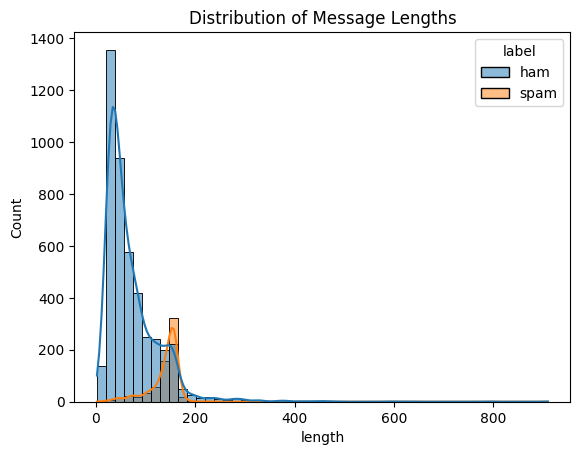

In [ ]:
# Message length distribution
df['length'] = df['message'].apply(len)

# Plot distribution
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True)
plt.title("Distribution of Message Lengths")
plt.show()

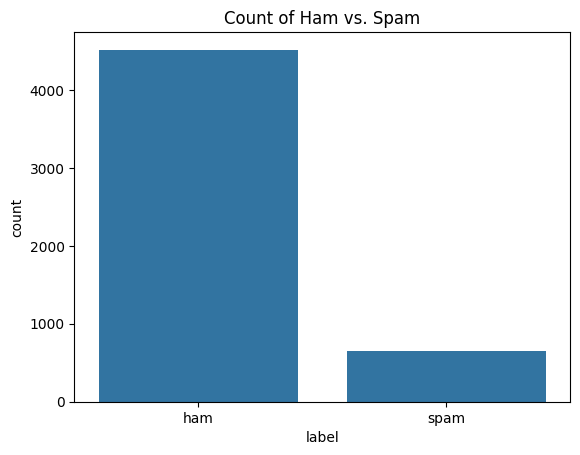

In [ ]:
# Count plot
sns.countplot(data=df, x='label')
plt.title("Count of Ham vs. Spam")
plt.show()

# **Text Preprocessing**

In [ ]:
# Download the stopwords corpus from NLTK
nltk.download('stopwords')

# Load the set of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize the Porter Stemmer for word stemming
stemmer = PorterStemmer()

# Define a function to preprocess text messages
def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()
    # Remove punctuation from the text
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    # Split the text into individual words (tokens)
    tokens = text.split()
    # Stem each token and remove stopwords
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Join the processed tokens back into a string
    return ' '.join(tokens)

# Apply the preprocess_text function to the 'message' column of the DataFrame
# and store the cleaned text in a new column called 'cleaned'
df['cleaned'] = df['message'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Vectorization and Data Splitting**

In [ ]:
# Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned'])

# Label encoding
y = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train and Evaluate Naive Bayes Model:**

In [ ]:
# Model training
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9613152804642167
Confusion Matrix:
 [[889   0]
 [ 40 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



# **Train SVM Model**

In [ ]:
# SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# **Train Random Forest Model**

In [ ]:
# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# **Evaluate Naive bayes, SVM and Random Forest Models**

In [ ]:
# Get classification report for Naive Bayes
nb_report = classification_report(y_test, y_pred, output_dict=True)

# Get classification report for SVM
svm_report = classification_report(y_test, svm_pred, output_dict=True)

# Get classification report for Random Forest
rf_report = classification_report(y_test, rf_pred, output_dict=True)

# **Prepare Model Comparison DataFrame**

In [ ]:
# Create a Pandas DataFrame to compare the performance of the models
comparison_df = pd.DataFrame({
    # Column for model names
    'Model': ['Naive Bayes', 'SVM', 'Random Forest'],
    # Column for accuracy scores of each model
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, rf_pred)],
    # Column for recall scores for the 'spam' class (label '1') for each model
    'Spam Recall': [nb_report['1']['recall'], svm_report['1']['recall'], rf_report['1']['recall']],
    # Column for F1-score for the 'spam' class (label '1') for each model
    'Spam F1-Score': [nb_report['1']['f1-score'], svm_report['1']['f1-score'], rf_report['1']['f1-score']]
})

# Print a header for the comparison DataFrame
print("Model Comparison DataFrame:")
# Display the comparison DataFrame
display(comparison_df)

Model Comparison DataFrame:


,Model,Accuracy,Spam Recall,Spam F1-Score
0,Naive Bayes,0.961315,0.724138,0.840000
1,SVM,0.968085,0.772414,0.871595
2,Random Forest,0.970019,0.793103,0.881226


# **Visualize Model Comparison Metrics (Bar Plots)**

<ipython-input-107-3343de87cae8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='coolwarm', ax=axes[0])
<ipython-input-107-3343de87cae8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Spam Recall', data=comparison_df, palette='viridis', ax=axes[1])
<ipython-input-107-3343de87cae8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Spam F1-Score', data=comparison_df, palette='plasma', ax=axes[2])


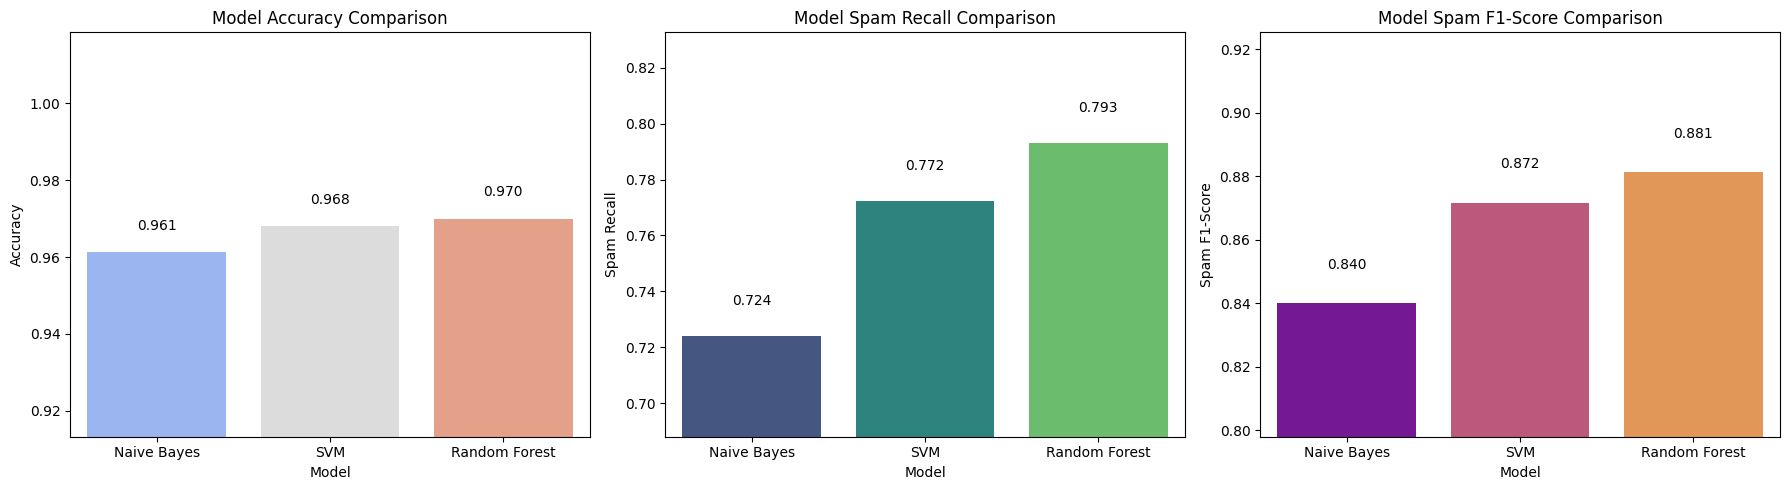

In [ ]:
# Assuming 'comparison_df' DataFrame containing metrics for NB, SVM, and RF is available

# Create a figure and a set of subplots to hold the bar plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5)) # 1 row, 3 columns for 3 plots

# Plotting Accuracy comparison
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Model Accuracy Comparison')
# Adjust y-axis limits dynamically based on the data for better visualization
axes[0].set_ylim(comparison_df['Accuracy'].min() * 0.95, comparison_df['Accuracy'].max() * 1.05)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy')
# Add numerical labels on top of bars
for i, row in comparison_df.iterrows():
    axes[0].text(i, row['Accuracy'] + 0.005, f"{row['Accuracy']:.3f}", ha='center', va='bottom')

# Plotting Spam Recall comparison
sns.barplot(x='Model', y='Spam Recall', data=comparison_df, palette='viridis', ax=axes[1])
axes[1].set_title('Model Spam Recall Comparison')
# Adjust y-axis limits dynamically based on the data
axes[1].set_ylim(comparison_df['Spam Recall'].min() * 0.95, comparison_df['Spam Recall'].max() * 1.05)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Spam Recall')
# Add numerical labels on top of bars
for i, row in comparison_df.iterrows():
    axes[1].text(i, row['Spam Recall'] + 0.01, f"{row['Spam Recall']:.3f}", ha='center', va='bottom')

# Plotting Spam F1-Score comparison
sns.barplot(x='Model', y='Spam F1-Score', data=comparison_df, palette='plasma', ax=axes[2])
axes[2].set_title('Model Spam F1-Score Comparison')
# Adjust y-axis limits dynamically based on the data
axes[2].set_ylim(comparison_df['Spam F1-Score'].min() * 0.95, comparison_df['Spam F1-Score'].max() * 1.05)
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Spam F1-Score')
# Add numerical labels on top of bars
for i, row in comparison_df.iterrows():
    axes[2].text(i, row['Spam F1-Score'] + 0.01, f"{row['Spam F1-Score']:.3f}", ha='center', va='bottom')

# Adjust the layout to prevent overlapping elements
plt.tight_layout()
# Display the generated plot
plt.show()

# **Conclusion:**

The project successfully implemented and compared three machine learning models (Naive Bayes, Support Vector Machine, and Random Forest) for classifying spam and ham messages. The results, as summarized in the comparison_df and visualized in the bar plots, indicate that all three models performed well, achieving high accuracy. Specifically, the comparison focused on accuracy, spam recall, and spam F1-score. To draw a definitive conclusion about which model is best for this specific problem, one would analyze these metrics, considering that recall is particularly important for spam detection to minimize false negatives (i.e., not missing spam). The visualization of the metrics provides a clear comparison of the models' performance on these key indicators.